In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


!pip install imbalanced-learn
!pip3 install lightgbm

from google.colab import drive
drive.mount('/content/drive')

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None

# Import library for SMOTE analysis
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
print(imblearn.__version__)

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler 

# Import performance metrics
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve,f1_score,log_loss,accuracy_score
from sklearn import metrics

# Parameter tuning and cross-validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold, KFold
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

#Import Various Algorithm :
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.ensemble import GradientBoostingClassifier as GB
from xgboost import XGBClassifier as XGB
from sklearn.ensemble import StackingClassifier
import lightgbm as LGB

0.4.3


# Train-Test

In [ ]:
# Dataset 
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_rf.csv').drop('Unnamed: 0',axis=1)
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_rf.csv').drop('Unnamed: 0',axis=1)


main_df=pd.concat([train,test])
X=main_df.drop('default_ind',axis=1)
y=main_df.iloc[:,14]

In [ ]:
# For LogReg and Naive Bayes, we use Power-transform (Yeo-Johnson transform) on X_train and X_test
# This brings the skewness of all num variables very close to 0 and mean=0, std=1.

train_scaled = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_rf.csv').drop('Unnamed: 0',axis=1)
test_scaled  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_rf.csv').drop('Unnamed: 0',axis=1)

# Power Transform
fit_lambda             = PowerTransformer().fit(train_scaled.iloc[:,:14])
train_scaled.iloc[:,:14] = pd.DataFrame(fit_lambda.transform(train_scaled.iloc[:,:14]),columns=train_scaled.columns[:14])
test_scaled.iloc[:,:14]  = pd.DataFrame(fit_lambda.transform(test_scaled.iloc[:,:14]) ,columns=test_scaled.columns[:14])

In [ ]:
## Splitting into train and test:

X_train = train.drop('default_ind',axis=1)
y_train = train.iloc[:,14]
X_test  = test.drop('default_ind',axis=1)
y_test = test.iloc[:,14]

X_train_scaled = train_scaled.drop('default_ind',axis=1)
y_train_scaled = train_scaled.iloc[:,14]
X_test_scaled  = test_scaled.drop('default_ind',axis=1)
y_test_scaled  = test_scaled.iloc[:,14]

# Over Sampling

In [ ]:
# over-Sampling using SMOTE (full)
for i in [0.15,0.2,0.25,0.3,0.35,0.4]:
    X1, y1 = SMOTE(random_state=10, sampling_strategy=i).fit_resample(X,y)

    print('\033[1m\033[4mSAMPLING-STRATEGY \033[0m\033[0m--',i)
    print('\nShape of X1_Train :',X1.shape)
    print('Shape of y1_Train :',y1.shape)
    print('\nCOUNT OF DEFAULT-IND--')
    print(pd.Series(y1).value_counts())
    print('\nPERCENT OF DEFAULT-IND--')
    print(pd.Series(y1).value_counts(normalize=True)*100)
    print('\n')

In [ ]:
# Choosing a value of i at random, to check the effect of smote on the model
# Using sampling_strategy=0.35

X1, y1 = SMOTE(random_state=10, sampling_strategy=0.35).fit_resample(X,y)

# Random Under Sampling

In [ ]:
for i in [0.4,0.5,0.6,0.7,0.8,0.9,1] :   
    Xu,yu = RandomUnderSampler(sampling_strategy=i, random_state=10).fit_resample(X,y)
        
    print('\033[1m\033[4mSAMPLING-STRATEGY \033[0m\033[0m--',i)
    print('\nShape of X2_Train :',Xu.shape)
    print('Shape of y2_Train :',yu.shape)
    print('\n\033[4mCOUNT OF DEFAULT-IND\033[0m:')
    print(pd.Series(yu).value_counts())
    print('\n\033[4mPERCENT OF DEFAULT-IND\033[0m:')
    print(pd.Series(yu).value_counts(normalize=True)*100)
    print('\n')

In [ ]:
# Choosing a value of i at random, to check the effect of smote on the model
# Using sampling strategy=0.42

Xu,yu = RandomUnderSampler(sampling_strategy=0.42, random_state=10).fit_resample(X,y)

## SMOTE + Under Sampling

In [ ]:
# Using both arbitary values together for over+under sampling, to test the model:

# define pipeline
over = SMOTE(sampling_strategy=0.35)
under = RandomUnderSampler(sampling_strategy=0.42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_ou , y_ou = pipeline.fit_resample(X,y)

print('\nShape of X2_Train :',X_ou.shape)
print('Shape of y2_Train :',y_ou.shape)
print('\n\033[4mCOUNT OF DEFAULT-IND\033[0m:')
print(pd.Series(y_ou).value_counts())
print('\n\033[4mPERCENT OF DEFAULT-IND\033[0m:')
print(pd.Series(y_ou).value_counts(normalize=True)*100)
print('\n')


Shape of X2_Train : (625337, 26)
Shape of y2_Train : (625337,)

COUNT OF DEFAULT-IND:
0    440378
1    184959
dtype: int64

PERCENT OF DEFAULT-IND:
0    70.422508
1    29.577492
dtype: float64




# SMOTE + UnderSampling tuning

In [ ]:
## I've deleted most of the outputs coz it was too long. 

In [ ]:
# optimizing with DT Classifier

for i in [0.15,0.25]:
    print('\n============================================================================ i={}'.format(i))
    for j in [0.3,0.4,0.5,0.6,0.7]:
        # Creating pipeline
        over = SMOTE(sampling_strategy=i,random_state=10)
        under = RandomUnderSampler(sampling_strategy=j,random_state=10)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)

        # transform the dataset and fit the model
        X1_ou , y1_ou = pipeline.fit_resample(X,y)
        dt=DT(random_state=10, class_weight='balanced').fit(X1_ou,y1_ou)


        print('\n\033[1m----------------------------- i={} : j={} ----------------------\033[0m'.format(i,j))
        print('\033[4mCOUNT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts())
        print('\033[4mPERCENT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts(normalize=True)*100)
        print(confusion_matrix(y_test,dt.predict(X_test)))
        print(classification_report(y_train,dt.predict(X_train)))
        print(classification_report(y_test,dt.predict(X_test)))

In [ ]:
for i in [0.35]:
    print('\n============================================================================ i={}'.format(i))
    for j in [0.4,0.5,0.6,0.7]:
        # Creating pipeline
        over = SMOTE(sampling_strategy=i,random_state=10)
        under = RandomUnderSampler(sampling_strategy=j,random_state=10)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)

        # transform the dataset and fit the model
        X1_ou , y1_ou = pipeline.fit_resample(X,y)
        dt=DT(random_state=10, class_weight='balanced').fit(X1_ou,y1_ou)


        print('\n\033[1m----------------------------- i={} : j={} ----------------------\033[0m'.format(i,j))
        print('\033[4mCOUNT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts())
        print('\033[4mPERCENT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts(normalize=True)*100)
        print(confusion_matrix(y_test,dt.predict(X_test)))
        print(classification_report(y_train,dt.predict(X_train)))
        print(classification_report(y_test,dt.predict(X_test)))

In [ ]:
for i in [0.45]:
    print('\n============================================================================ i={}'.format(i))
    for j in [0.5,0.6,0.7,0.8]:
        # Creating pipeline
        over = SMOTE(sampling_strategy=i,random_state=10)
        under = RandomUnderSampler(sampling_strategy=j,random_state=10)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)

        # transform the dataset and fit the model
        X1_ou , y1_ou = pipeline.fit_resample(X,y)
        dt=DT(random_state=10, class_weight='balanced').fit(X1_ou,y1_ou)


        print('\n\033[1m----------------------------- i={} : j={} ----------------------\033[0m'.format(i,j))
        print('\033[4mCOUNT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts())
        print('\033[4mPERCENT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts(normalize=True)*100)
        print(confusion_matrix(y_test,dt.predict(X_test)))
        print(classification_report(y_train,dt.predict(X_train)))
        print(classification_report(y_test,dt.predict(X_test)))

In [ ]:
for i in [0.55]:
    print('\n============================================================================ i={}'.format(i))
    for j in [0.6,0.7,0.8]:
        # Creating pipeline
        over = SMOTE(sampling_strategy=i,random_state=10)
        under = RandomUnderSampler(sampling_strategy=j,random_state=10)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)

        # transform the dataset and fit the model
        X1_ou , y1_ou = pipeline.fit_resample(X,y)
        dt=DT(random_state=10, class_weight='balanced').fit(X1_ou,y1_ou)


        print('\n\033[1m----------------------------- i={} : j={} ----------------------\033[0m'.format(i,j))
        print('\033[4mCOUNT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts())
        print('\033[4mPERCENT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts(normalize=True)*100)
        print(confusion_matrix(y_test,dt.predict(X_test)))
        print(classification_report(y_train,dt.predict(X_train)))
        print(classification_report(y_test,dt.predict(X_test)))

In [ ]:
## After looking at the above results, we realise the best suited range for high performance is between
##  i = (0.2 to 0.3)  and  j = (0.3 to 0.4)

## So, super fine tuning between those values:

for i in [0.2,0.22,0.24,0.26,0.28,0.3]:
    print('\n============================================================================ i={}'.format(i))
    for j in [0.3,0.32,0.34,0.36,0.38,0.4]:
        # Creating pipeline
        over = SMOTE(sampling_strategy=i,random_state=10)
        under = RandomUnderSampler(sampling_strategy=j,random_state=10)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)

        # transform the dataset and fit the model
        X1_ou , y1_ou = pipeline.fit_resample(X,y)
        dt=DT(random_state=10, class_weight='balanced').fit(X1_ou,y1_ou)


        print('\n\033[1m----------------------------- i={} : j={} ----------------------\033[0m'.format(i,j))
        print('\033[4mCOUNT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts())
        print('\033[4mPERCENT OF DEFAULT-IND\033[0m:')
        print(pd.Series(y1_ou).value_counts(normalize=True)*100)
        print(confusion_matrix(y_test,dt.predict(X_test)))
        print(classification_report(y_train,dt.predict(X_train)))
        print(classification_report(y_test,dt.predict(X_test)))

# SAMPLING results cross validation

In [ ]:
## Best param--- i=0.28,j=0.34 ---> ratio of (75:25) ----- got this by studying all the above combinations.

# Creating pipeline
over = SMOTE(sampling_strategy=0.28,random_state=10)
under = RandomUnderSampler(sampling_strategy=0.34,random_state=10)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset and fit the model
X11 , y11 = pipeline.fit_resample(X,y)
dt=DT(random_state=10, class_weight='balanced')

In [ ]:
## Cross validation------ f1 

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
scores = cross_val_score(dt, X11, y11, scoring='f1', cv=cv, n_jobs=-1)
print('Mean F1 score: ',np.mean(scores))

Mean F1 score:  0.8166966218062542


In [ ]:
## Cross validation------ accuracy

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
scores = cross_val_score(dt, X11, y11, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean accuracy: ',np.mean(scores))

Mean accuracy:  0.906052011145824


In [ ]:
## Cross validation------ recall

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
scores = cross_val_score(dt, X11, y11, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall: ',np.mean(scores))

Mean recall:  0.8248497159525009


In [ ]:
## Tuning the k value in smote:

## Using F1 scoring--

for k in range(2,10):
    # Creating pipeline
    over = SMOTE(sampling_strategy=0.28,random_state=10, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.34,random_state=10)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    # transform the dataset and fit the model
    X11 , y11 = pipeline.fit_resample(X,y)
    dt=DT(random_state=10, class_weight='balanced')

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
    scores = cross_val_score(dt, X11, y11, scoring='f1', cv=cv, n_jobs=-1)
    print(k,' : Mean F1 score = ',np.mean(scores))

## Values 2, 4, 5 seem good.

2  : Mean F1 score =  0.8172374590836868
3  : Mean F1 score =  0.8160198038146056
4  : Mean F1 score =  0.8162316704585688
5  : Mean F1 score =  0.8163196736462944
6  : Mean F1 score =  0.8147669736629782
7  : Mean F1 score =  0.8156812825833443
8  : Mean F1 score =  0.8160122468593529
9  : Mean F1 score =  0.8155154981426519


In [ ]:
## Tuning value of k from 2,5 

## Using accuracy scoring--

for k in [2,5]:
    # Creating pipeline
    over = SMOTE(sampling_strategy=0.28,random_state=10, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.34,random_state=10)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    # transform the dataset and fit the model
    X11 , y11 = pipeline.fit_resample(X,y)
    dt=DT(random_state=10, class_weight='balanced')

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
    scores = cross_val_score(dt, X11, y11, scoring='accuracy', cv=cv, n_jobs=-1)
    print(k,' : Mean F1 score = ',np.mean(scores))

## Values 2 and 5 are good.

2  : Mean F1 score =  0.9068110070908261
5  : Mean F1 score =  0.906052011145824


In [ ]:
## Checking using roc_auc scoring--

for k in [2,5]:
    # Creating pipeline
    over = SMOTE(sampling_strategy=0.28,random_state=10, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.34,random_state=10)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    # transform the dataset and fit the model
    X11 , y11 = pipeline.fit_resample(X,y)
    dt=DT(random_state=10, class_weight='balanced')

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
    scores = cross_val_score(dt, X11, y11, scoring='roc_auc', cv=cv, n_jobs=-1)
    print(k,' : Mean F1 score = ',np.mean(scores))

2  : Mean F1 score =  0.8795432030594933
5  : Mean F1 score =  0.8787592617719733


# **FINAL DATASET AFTER IMBALANCE TREATMENT**

### On Entire Dataset

In [ ]:
## From the above, k=2 gives the higest f1 score
## Thus, i=0.28, j=0.34, k=2:

# Creating pipeline
over = SMOTE(sampling_strategy=0.28,random_state=10, k_neighbors=2)
under = RandomUnderSampler(sampling_strategy=0.34,random_state=10)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset and fit the model
X_balanced , y_balanced = pipeline.fit_resample(X,y)
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced= train_test_split(X_balanced,y_balanced, test_size = 0.30, random_state = 10)

In [ ]:
print('Shape of X_Train :',X_train_balanced.shape)
print('Shape of y_Train :',y_train_balanced.shape)
print('\nShape of X_Test  :',X_test_balanced.shape)
print('Shape of y_Test  :',y_test_balanced.shape)

print('\n\n\033[4mCOUNT OF DEFAULT-IND IN TRAIN\033[0m:')
print(pd.Series(y_train_balanced).value_counts())
print('\nPERCENT OF DEFAULT-IND:')
print(pd.Series(y_train_balanced).value_counts(normalize=True)*100)

print('\n\n\033[4mCOUNT OF DEFAULT-IND IN TEST\033[0m:')
print(pd.Series(y_test_balanced).value_counts())
print('\nPERCENT OF DEFAULT-IND:')
print(pd.Series(y_test_balanced).value_counts(normalize=True)*100)

Shape of X_Train : (583181, 26)
Shape of y_Train : (583181,)

Shape of X_Test  : (249936, 26)
Shape of y_Test  : (249936,)


COUNT OF DEFAULT-IND IN TRAIN:
0    435208
1    147973
dtype: int64

PERCENT OF DEFAULT-IND:
0    74.626574
1    25.373426
dtype: float64


COUNT OF DEFAULT-IND IN TEST:
0    186521
1     63415
dtype: int64

PERCENT OF DEFAULT-IND:
0    74.627505
1    25.372495
dtype: float64


In [ ]:
X_balanced_csv = pd.DataFrame(X_balanced, columns=X.columns)
y_balanced_csv = pd.DataFrame(y_balanced, columns=['default_ind'])
balanced_df=pd.concat([X_balanced_csv,y_balanced_csv],axis=1)

### Only On Train Dataset

In [ ]:
## From the above, k=2 gives the higest f1 score
## Thus, i=0.28, j=0.34, k=2:

# Creating pipeline
over = SMOTE(sampling_strategy=0.28,random_state=10, k_neighbors=2)
under = RandomUnderSampler(sampling_strategy=0.34,random_state=10)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset and fit the model
X_train_balanced1 , y_train_balanced1 = pipeline.fit_resample(X_train,y_train)

In [ ]:
## For smote on Linear SVM, LR and NB

X_train_balanced1_scaled, y_train_balanced1_scaled = pipeline.fit_resample(X_train,y_train)
X_test_balanced1_scaled = test.drop('default_ind',axis=1)

## Transforming the data
fit_lambda_bal           = PowerTransformer().fit(X_train_balanced1[:,:14])
X_train_balanced1_scaled[:,:14] = pd.DataFrame(fit_lambda_bal.transform(X_train_balanced1[:,:14]),columns=train.columns[:14])
X_test_balanced1_scaled.iloc[:,:14]  = pd.DataFrame(fit_lambda_bal.transform(X_test.iloc[:,:14]) ,columns=test_scaled.columns[:14])

# Exporting Dataset after SMOTE

In [ ]:
balanced_df.to_csv('balanced_dataset_after_smote.csv')

In [ ]:
from google.colab import files
balanced_df.to_csv('balanced_df.csv') 
files.download('balanced_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODEL BUILDING**

### Decision Tree

In [ ]:
# Base model
dt=DT(random_state=10, class_weight='balanced').fit(X_train_balanced1,y_train_balanced1)
print(confusion_matrix(y_test,dt.predict(X_test)))
print(classification_report(y_train,dt.predict(X_train)))
print(classification_report(y_test,dt.predict(X_test)))

[[211578  14924]
 [ 10863   2080]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    528457
           1       0.83      1.00      0.91     30357

    accuracy                           0.99    558814
   macro avg       0.91      0.99      0.95    558814
weighted avg       0.99      0.99      0.99    558814

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    226502
           1       0.12      0.16      0.14     12943

    accuracy                           0.89    239445
   macro avg       0.54      0.55      0.54    239445
weighted avg       0.91      0.89      0.90    239445



In [ ]:
dt.get_depth()

47

In [ ]:
## Tuning the hyperparameters
dt1=DT(random_state = 10,class_weight='balanced')
params={'max_depth':np.arange(1,55),'criterion':['entropy','gini']}
kf=KFold(n_splits=3,shuffle=True,random_state=10)
GS=GridSearchCV(dt1,params,cv=kf,n_jobs=-1,scoring='f1')
GS.fit(X_train_balanced,y_train_balanced)
GS.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [ ]:
# Tuned Decision Tree
dt_tuned=DT(random_state=10, class_weight='balanced', max_depth=14, criterion='gini').fit(X_train_balanced1,y_train_balanced1)
print(confusion_matrix(y_test,dt_tuned.predict(X_test)))
print(classification_report(y_train,dt_tuned.predict(X_train)))
print(classification_report(y_test,dt_tuned.predict(X_test)))

[[212356  14146]
 [  9663   3280]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    528457
           1       0.23      0.31      0.27     30357

    accuracy                           0.91    558814
   macro avg       0.60      0.63      0.61    558814
weighted avg       0.92      0.91      0.91    558814

              precision    recall  f1-score   support

           0       0.96      0.94      0.95    226502
           1       0.19      0.25      0.22     12943

    accuracy                           0.90    239445
   macro avg       0.57      0.60      0.58    239445
weighted avg       0.91      0.90      0.91    239445



In [ ]:
y_test_proba_dt = dt4.predict_proba(X_test)[:,1]
print('ROC AUC :',roc_auc_score(y_test,y_test_proba_dt))

ROC AUC : 0.77954899214054


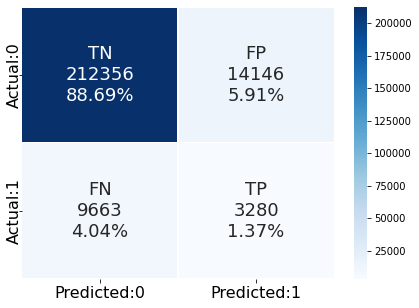

In [ ]:
y_pred=dt4.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

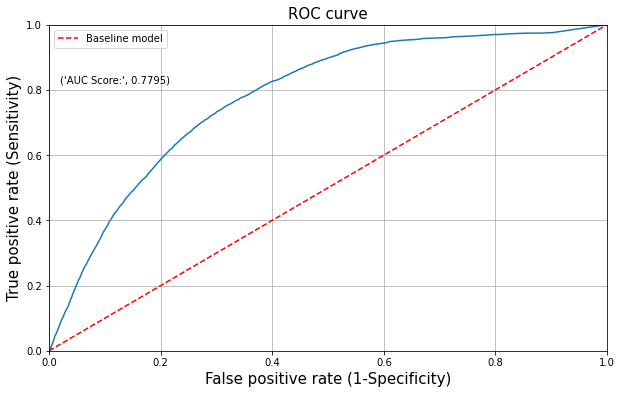

In [ ]:
get_roc_curve(y_test,y_test_proba_dt)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_proba_dt)
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.750599,0.316474,0.165881,0.434125
1,0.749285,0.315825,0.166251,0.433460
2,0.748822,0.315591,0.167673,0.433231
3,0.755312,0.322611,0.163934,0.432701
4,0.754694,0.321997,0.165135,0.432697


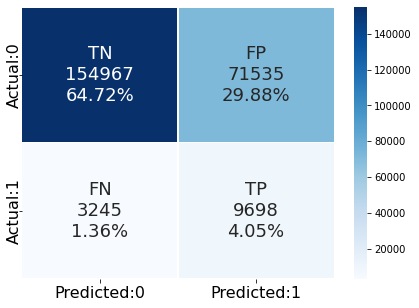

In [ ]:
y_pred_youden = [ 0 if x < 0.165881 else 1 for x in y_test_proba_dt]
plot_confusion_matrix(y_test,y_pred_youden)

In [ ]:
print(classification_report(y_test,y_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81    226502
           1       0.12      0.75      0.21     12943

    accuracy                           0.69    239445
   macro avg       0.55      0.72      0.51    239445
weighted avg       0.93      0.69      0.77    239445



### Random Forest

In [ ]:
# Random Forest 
rf=RF(criterion='gini',random_state = 10,class_weight='balanced', max_depth=14).fit(X_train_balanced1,y_train_balanced1)
print(confusion_matrix(y_test,rf.predict(X_test)))
print(classification_report(y_train,rf.predict(X_train)))
print(classification_report(y_test,rf.predict(X_test)))

[[219677   6825]
 [ 11179   1764]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    528457
           1       0.24      0.16      0.20     30357

    accuracy                           0.93    558814
   macro avg       0.60      0.57      0.58    558814
weighted avg       0.91      0.93      0.92    558814

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    226502
           1       0.21      0.14      0.16     12943

    accuracy                           0.92    239445
   macro avg       0.58      0.55      0.56    239445
weighted avg       0.91      0.92      0.92    239445



In [ ]:
## Tuning the hyperparameters
rf1=RF(criterion='gini',random_state = 10,class_weight='balanced', max_depth=14)
params={'n_estimators':range(20,150,2)}
kf=KFold(n_splits=3,shuffle=True,random_state=10)
rf_GS=GridSearchCV(rf1,params,cv=kf,n_jobs=-1,scoring='f1')
rf_GS.fit(X_train_balanced,y_train_balanced)
rf_GS.best_params_

{'n_estimators': 100}

In [ ]:
# Fitting Random Forest model with best parameters
rf1=RF(n_estimators=100,criterion='gini',random_state = 10,class_weight='balanced',max_depth=14).fit(X_train_balanced1,y_train_balanced1)
print(confusion_matrix(y_test,rf1.predict(X_test)))
print(classification_report(y_train,rf1.predict(X_train)))
print(classification_report(y_test,rf1.predict(X_test)))

[[219677   6825]
 [ 11179   1764]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    528457
           1       0.24      0.16      0.20     30357

    accuracy                           0.93    558814
   macro avg       0.60      0.57      0.58    558814
weighted avg       0.91      0.93      0.92    558814

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    226502
           1       0.21      0.14      0.16     12943

    accuracy                           0.92    239445
   macro avg       0.58      0.55      0.56    239445
weighted avg       0.91      0.92      0.92    239445



In [ ]:
y_test_proba_rf = rf1.predict_proba(X_test)[:,1]
print('ROC AUC :',roc_auc_score(y_test,y_test_proba_rf))

ROC AUC : 0.7738212140083236


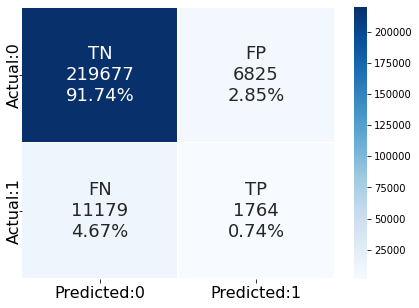

In [ ]:
y_pred=rf1.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

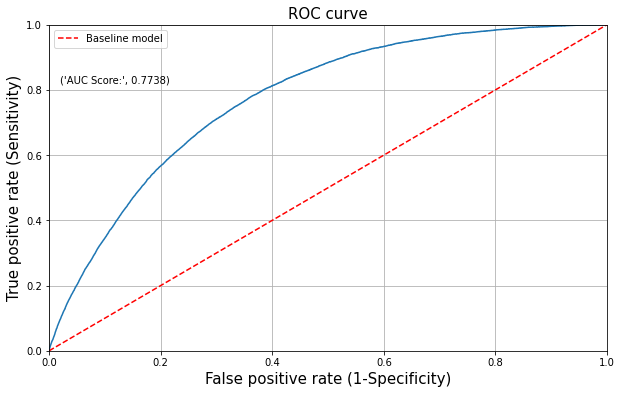

In [ ]:
get_roc_curve(y_test,y_test_proba_rf)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_proba_rf)
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.781349,0.363908,0.204019,0.417441
1,0.782508,0.365074,0.203434,0.417434
2,0.781040,0.363608,0.204167,0.417432
3,0.782044,0.364619,0.203655,0.417425
4,0.780963,0.363542,0.204206,0.417421


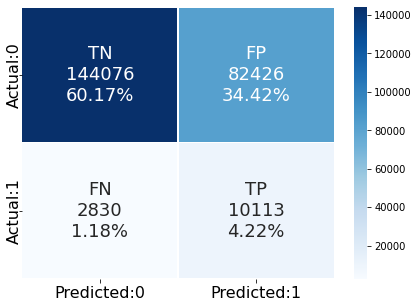

In [ ]:
y_pred_youden = [ 0 if x < 0.204019 else 1 for x in y_test_proba_rf]
plot_confusion_matrix(y_test,y_pred_youden)

In [ ]:
print(classification_report(y_test,y_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.64      0.77    226502
           1       0.11      0.78      0.19     12943

    accuracy                           0.64    239445
   macro avg       0.55      0.71      0.48    239445
weighted avg       0.93      0.64      0.74    239445



### SVM

In [ ]:
svm_model=LinearSVC(random_state=10, class_weight='balanced').fit(X_train_balanced1_scaled,y_train_balanced1_scaled)
print(confusion_matrix(y_test_scaled,svm_model.predict(X_test_scaled)))
print(classification_report(y_train_scaled,svm_model.predict(X_train_scaled)))
print(classification_report(y_test_scaled,svm_model.predict(X_test_scaled)))

[[147582  78920]
 [  4056   8887]]
              precision    recall  f1-score   support

           0       0.97      0.65      0.78    528457
           1       0.10      0.69      0.18     30357

    accuracy                           0.66    558814
   macro avg       0.54      0.67      0.48    558814
weighted avg       0.93      0.66      0.75    558814

              precision    recall  f1-score   support

           0       0.97      0.65      0.78    226502
           1       0.10      0.69      0.18     12943

    accuracy                           0.65    239445
   macro avg       0.54      0.67      0.48    239445
weighted avg       0.93      0.65      0.75    239445



In [ ]:
## Hyperparameter Tuning
params =  {'C': [0.1,0.5,1,5, 10,20, 100]}
svm=LinearSVC(random_state=10, class_weight='balanced' )
kf=KFold(n_splits=3,shuffle=True,random_state=10)
svm_GS=GridSearchCV(svm,params,cv=kf,n_jobs=-1,scoring='recall')
svm_GS.fit(X_train_balanced1_scaled,y_train_balanced1_scaled)
svm_GS.best_params_

In [ ]:
svm_tuned=LinearSVC(random_state=10, class_weight='balanced' ,C=0.1).fit(X_train_balanced1_scaled,y_train_balanced1_scaled)
print(confusion_matrix(y_test_scaled,svm_tuned.predict(X_test_scaled)))
print(classification_report(y_train_scaled,svm_tuned.predict(X_train_scaled)))
print(classification_report(y_test_scaled,svm_tuned.predict(X_test_scaled)))

[[122415 104087]
 [  2414  10529]]
              precision    recall  f1-score   support

           0       0.98      0.54      0.70    528457
           1       0.09      0.81      0.17     30357

    accuracy                           0.56    558814
   macro avg       0.54      0.68      0.43    558814
weighted avg       0.93      0.56      0.67    558814

              precision    recall  f1-score   support

           0       0.98      0.54      0.70    226502
           1       0.09      0.81      0.17     12943

    accuracy                           0.56    239445
   macro avg       0.54      0.68      0.43    239445
weighted avg       0.93      0.56      0.67    239445



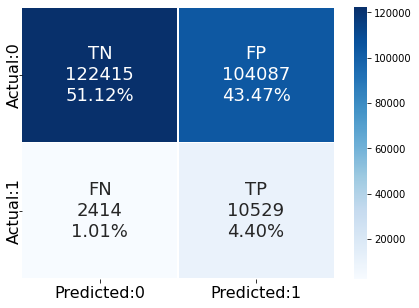

In [ ]:
y_pred=svm_tuned.predict(X_test_scaled)
plot_confusion_matrix(y_test_scaled,y_pred)

### Logistic Regression

In [ ]:
# Logistic Regression 
lr= LR(random_state = 10,class_weight='balanced').fit(X_train_balanced1_scaled,y_train_balanced1_scaled)
print(confusion_matrix(y_test_scaled,lr.predict(X_test_scaled)))
print(classification_report(y_train_scaled,lr.predict(X_train_scaled)))
print(classification_report(y_test_scaled,lr.predict(X_test_scaled)))

[[124408 102094]
 [  2511  10432]]
              precision    recall  f1-score   support

           0       0.98      0.55      0.70    528457
           1       0.09      0.81      0.17     30357

    accuracy                           0.56    558814
   macro avg       0.54      0.68      0.44    558814
weighted avg       0.93      0.56      0.68    558814

              precision    recall  f1-score   support

           0       0.98      0.55      0.70    226502
           1       0.09      0.81      0.17     12943

    accuracy                           0.56    239445
   macro avg       0.54      0.68      0.44    239445
weighted avg       0.93      0.56      0.67    239445



In [ ]:
## Hyperparameter Tuning
params = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
lr_model = LR(class_weight='balanced',random_state=10)       
lr_GS = GridSearchCV(lr_model,params,scoring='recall',n_jobs=-1)
lr_GS.fit(X_train_balanced1_scaled,y_train_balanced1_scaled)
lr_GS.best_params_

{'C': 0.2, 'penalty': 'l2'}

In [ ]:
## Fitting model with tuned parameters
lr_tuned=LR(random_state=10, class_weight='balanced',C= 0.2, penalty = 'l2' ).fit(X_train_balanced1_scaled,y_train_balanced1_scaled)
print(confusion_matrix(y_test_scaled,lr_tuned.predict(X_test_scaled)))
print(classification_report(y_train_scaled,lr_tuned.predict(X_train_scaled)))
print(classification_report(y_test_scaled,lr_tuned.predict(X_test_scaled)))

[[124429 102073]
 [  2515  10428]]
              precision    recall  f1-score   support

           0       0.98      0.55      0.70    528457
           1       0.09      0.81      0.17     30357

    accuracy                           0.56    558814
   macro avg       0.54      0.68      0.44    558814
weighted avg       0.93      0.56      0.68    558814

              precision    recall  f1-score   support

           0       0.98      0.55      0.70    226502
           1       0.09      0.81      0.17     12943

    accuracy                           0.56    239445
   macro avg       0.54      0.68      0.44    239445
weighted avg       0.93      0.56      0.68    239445



In [ ]:
y_test_proba_lr = lr_tuned.predict_proba(X_test_scaled)[:,1]
print('ROC AUC :',roc_auc_score(y_test_scaled,y_test_proba_lr))

ROC AUC : 0.7449892930804805


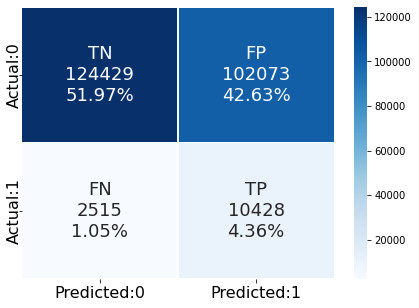

In [ ]:
y_pred=lr_tuned.predict(X_test_scaled)
plot_confusion_matrix(y_test_scaled,y_pred)

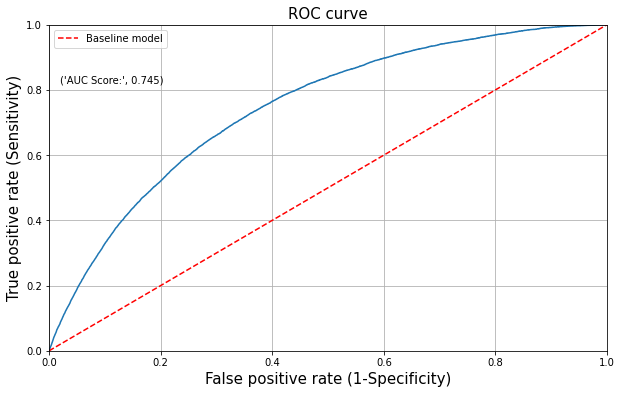

In [ ]:
get_roc_curve(y_test_scaled,y_test_proba_lr)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_scaled,y_test_proba_lr)
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.728425,0.361180,0.573077,0.367245
1,0.726648,0.359418,0.574473,0.367229
2,0.728193,0.360990,0.573226,0.367203
3,0.726725,0.359542,0.574369,0.367183
4,0.728347,0.361176,0.573087,0.367172


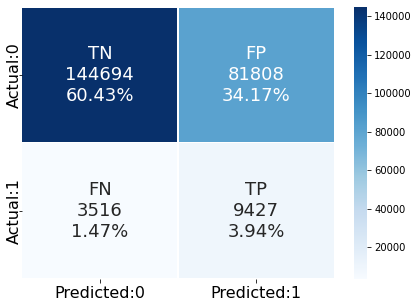

In [ ]:
y_pred_youden = [ 0 if x < 0.573077 else 1 for x in y_test_proba_lr]
plot_confusion_matrix(y_test_scaled,y_pred_youden)

In [ ]:
print(classification_report(y_test_scaled,y_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.64      0.77    226502
           1       0.10      0.73      0.18     12943

    accuracy                           0.64    239445
   macro avg       0.54      0.68      0.48    239445
weighted avg       0.93      0.64      0.74    239445



### Gaussian NB

In [ ]:
nb=NB().fit(X_train_balanced1_scaled, y_train_balanced1_scaled)
print(confusion_matrix(y_test_scaled,nb.predict(X_test_scaled)))
print(classification_report(y_train_scaled,nb.predict(X_train_scaled)))
print(classification_report(y_test_scaled,nb.predict(X_test_scaled)))

[[195505  30997]
 [  8443   4500]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91    528457
           1       0.13      0.35      0.19     30357

    accuracy                           0.83    558814
   macro avg       0.54      0.61      0.55    558814
weighted avg       0.91      0.83      0.87    558814

              precision    recall  f1-score   support

           0       0.96      0.86      0.91    226502
           1       0.13      0.35      0.19     12943

    accuracy                           0.84    239445
   macro avg       0.54      0.61      0.55    239445
weighted avg       0.91      0.84      0.87    239445



In [ ]:
## Hyperparameter Tuning

params = {'var_smoothing': np.logspace(0,-9, num=100)}
kf=KFold(n_splits=3,shuffle=True,random_state=10)

nb_GS = GridSearchCV(NB(), params, cv=kf, n_jobs=-1, scoring='recall').fit(X_train_balanced1_scaled, y_train_balanced1_scaled)
nb_GS.best_params_    

{'var_smoothing': 0.002848035868435802}

In [ ]:
## Fitting model with tuned parameters

nb_tuned=NB(var_smoothing= 0.002848035868435802).fit(X_train_balanced1_scaled, y_train_balanced1_scaled)
print(confusion_matrix(y_test_scaled,nb_tuned.predict(X_test_scaled)))
print(classification_report(y_train_scaled,nb_tuned.predict(X_train_scaled)))
print(classification_report(y_test_scaled,nb_tuned.predict(X_test_scaled)))

[[163500  63002]
 [  5736   7207]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.83    528457
           1       0.10      0.56      0.17     30357

    accuracy                           0.71    558814
   macro avg       0.53      0.64      0.50    558814
weighted avg       0.92      0.71      0.79    558814

              precision    recall  f1-score   support

           0       0.97      0.72      0.83    226502
           1       0.10      0.56      0.17     12943

    accuracy                           0.71    239445
   macro avg       0.53      0.64      0.50    239445
weighted avg       0.92      0.71      0.79    239445



In [ ]:
y_test_proba_nb = nb_tuned.predict_proba(X_test_scaled)[:,1]
print('ROC AUC :',roc_auc_score(y_test_scaled,y_test_proba_nb))

ROC AUC : 0.6997438445699303


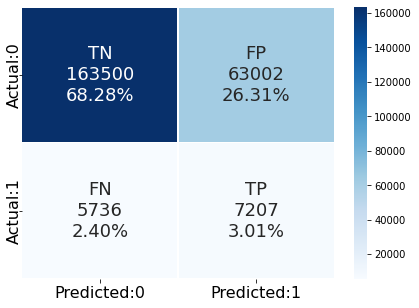

In [ ]:
y_pred=nb_tuned.predict(X_test_scaled)
plot_confusion_matrix(y_test_scaled,y_pred)

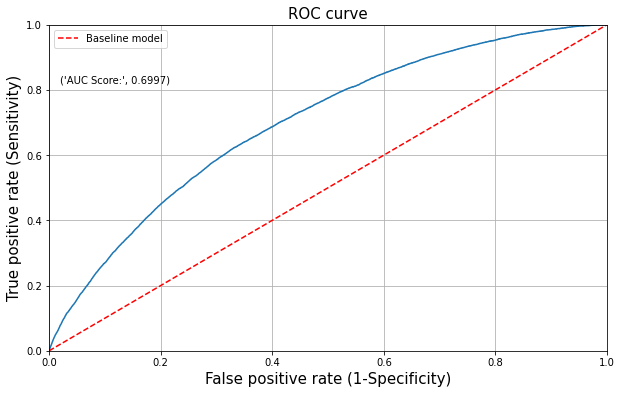

In [ ]:
get_roc_curve(nb_tuned,y_test_scaled,y_test_proba_nb)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_scaled,y_test_proba_nb)
youdens_table = pd.DataFrame({'TPR': tpr,'FPR': fpr,'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.622344,0.331026,0.410399,0.291318
1,0.622267,0.331013,0.410440,0.291254
2,0.622267,0.331026,0.410412,0.291241
3,0.622421,0.331194,0.410175,0.291228
4,0.622190,0.330964,0.410512,0.291226


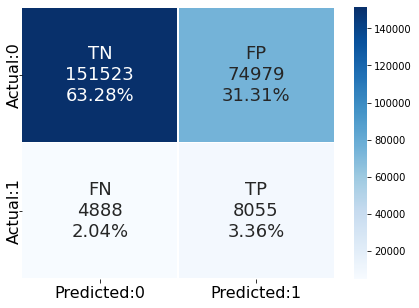

In [ ]:
y_pred_youden = [ 0 if x < 0.410399	 else 1 for x in y_test_proba_nb]
plot_confusion_matrix(y_test_scaled,y_pred_youden)

In [ ]:
print(classification_report(y_test_scaled,y_pred_youden))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79    226502
           1       0.10      0.62      0.17     12943

    accuracy                           0.67    239445
   macro avg       0.53      0.65      0.48    239445
weighted avg       0.92      0.67      0.76    239445



### K-Nearest Neighbours

In [ ]:
# KNN -- scaled X_balanced_scaled and X_test_scaled
knn= KNN(random_state = 10,class_weight='balanced').fit(X_balanced_scaled,y_balanced_scaled)
print(confusion_matrix(y_test,lr.predict(X_test_scaled)))
print(classification_report(y_train,lr.predict(X_train)))
print(classification_report(y_test,lr.predict(X_test_scaled)))

In [ ]:
knn1= KNN(random_state=10)
params = {'n_neighbors': np.arange(1, 25, 2),'metric': ['hamming','euclidean','manhattan','Chebyshev']}
kf=KFold(n_splits=3,shuffle=True,random_state=10)
knn_GS=GridSearchCV(knn1, params, cv=kf, scoring = 'f1')
knn_GS.fit(X_balanced_scaled, y_balanced_scaled)
knn_GS.best_params_

# Performance Metrics (User Defined)

In [ ]:
def plot_confusion_matrix( y_test,y_pred):
    plt.figure(figsize=(7,5))
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1']) 
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', linewidths=0.2, annot_kws={'size':18})
    plt.xticks(fontsize = 16,ha='center')
    plt.yticks(fontsize = 16,ha='center')
    plt.show()


In [ ]:
# Roc curve
def get_roc_curve(test,proba):
    plt.figure(figsize=[10,6])
    fpr, tpr, thresholds = roc_curve(test,proba)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--',label='Baseline model')
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.82, s = ('AUC Score:', round(roc_auc_score(test,proba),4)))
    plt.grid(True)
    plt.legend()
    plt.show()